In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
%matplotlib inline

In [92]:
df = pd.read_csv("new_college2.csv")

In [93]:
df.head()

,Name,G,FGA,3PA,FTA,ORB,TRB.1,AST.1,STL,BLK,...,Years,AP,LAT,SR,TQS,SVL,MVL,MBP,VORP,VORP_Max
0,abdelal01,33.500000,5.375016,NaN,2.340140,NaN,3.525,0.325,0.351910,0.484922,...,4.0,0.500000,NaN,NaN,NaN,NaN,NaN,NaN,-0.460000,-0.2
1,abdulma02,32.000000,21.890625,7.218750,6.406250,NaN,2.950,3.650,1.671875,0.109375,...,2.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.088889,1.6
2,abdulta01,27.666667,11.285641,1.922756,4.859071,NaN,5.800,1.400,1.020833,0.599423,...,3.0,0.333333,NaN,NaN,NaN,NaN,NaN,NaN,-0.216667,0.2
3,abdursh01,28.000000,14.214286,0.750000,8.892857,NaN,8.400,1.000,1.857143,1.250000,...,1.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.772727,3.5
4,ackeral01,29.333333,11.107461,3.282642,3.524432,NaN,5.600,2.800,1.515493,0.430174,...,3.0,0.000000,11.67,NaN,3.35,28.0,32.0,11.0,-0.150000,-0.1


In [94]:
df_cleaned = df.fillna(np.mean(df, axis=0))

In [95]:
X = df_cleaned.values[:,1:24]
Y = df_cleaned.VORP_Max

In [63]:
from sklearn.preprocessing import StandardScaler

In [96]:
X_normed = StandardScaler().fit_transform(X)

C:\Users\jessiejizhe\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


In [97]:
X_normed

array([[  7.84371487e-01,  -1.40524409e+00,  -9.30482893e-16, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [  3.43245195e-01,   3.71041053e+00,   2.52493684e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [ -9.31119647e-01,   4.25552198e-01,  -2.49185642e-01, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       ..., 
       [ -1.42125997e+00,  -1.58430783e+00,  -1.20715687e+00, ...,
          2.00474761e-14,   4.66236408e-15,  -3.95994687e-15],
       [  2.69724147e-01,  -1.46090596e+00,  -6.68410415e-01, ...,
         -2.68904671e+00,   2.78245600e+00,   3.12380257e+00],
       [ -1.42125997e+00,  -5.20684128e-01,  -9.13860250e-01, ...,
          2.27667261e+00,  -2.46689929e+00,  -2.17067071e+00]])

In [66]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression

In [98]:
ten_fold = model_selection.KFold(n_splits=10)

In [101]:
lr_model = LinearRegression()
# lr_model.fit(X_normed, Y)

R2 = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='r2')
MSE = model_selection.cross_val_score(lr_model, X_normed, Y, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE))

R Squared score of 10-fold cross validation: [ 0.15145039  0.22525397  0.32016299  0.14910338  0.16388545  0.17984808
  0.29173092  0.15702101  0.00577214  0.10614464] 
MSE score of 10-fold cross validation: [ 2.37346138  1.40533488  1.91667535  2.0060124   2.25896726  2.23012245
  2.39392806  2.39110991  1.32297701  2.1740341 ] 


## Drop Physical Attributes

In [78]:
df_cleaned.columns

Index(['Name', 'G', 'FGA', '3PA', 'FTA', 'ORB', 'TRB.1', 'AST.1', 'STL', 'BLK',
       'TOV', 'PF', 'MP.1', 'PTS.1', 'FG%', '3P%', 'FT%', 'Years', 'AP', 'LAT',
       'SR', 'TQS', 'SVL', 'MVL', 'MBP', 'VORP'],
      dtype='object')

In [88]:
X_1 = df_cleaned.values[:, 1:-7]
Y_1 = df_cleaned.VORP
X_1_normed = StandardScaler().fit_transform(X_1)

lr_model_1 = LinearRegression()
# lr_model.fit(X_normed, Y)

R2_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='r2').mean()
MSE_1 = model_selection.cross_val_score(lr_model_1, X_1_normed, Y_1, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2_1))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_1))

R Squared score of 10-fold cross validation: 0.17841232229766588 
MSE score of 10-fold cross validation: [ 0.57979464  0.31920996  0.61376076  0.51867214  0.79700677  0.68723695
  0.71480377  0.65678408  0.40785828  0.59986313] 


C:\Users\jessiejizhe\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000024E2A238AC8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000024E2BD29EF0>]], dtype=object)

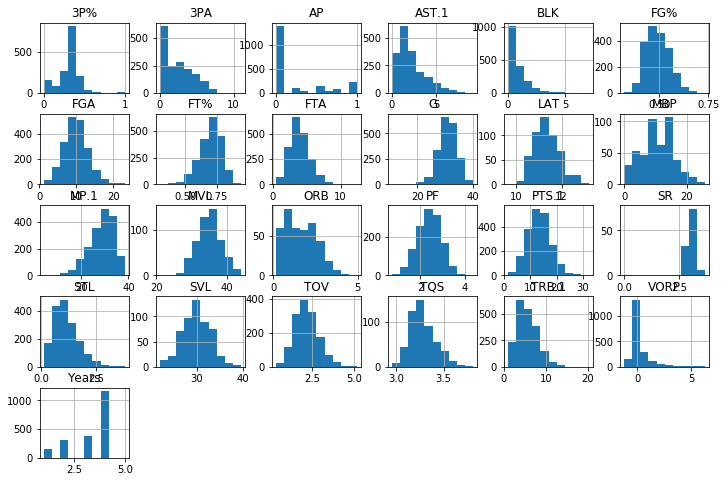

In [75]:
df.hist(figsize=(12,8), layout=(5,6))

## Raw Data

In [91]:
X_2 = df_cleaned.values[:, 1:-7]
Y_2 = df_cleaned.VORP

lr_model_2 = LinearRegression()
# lr_model.fit(X_normed, Y)

R2_2 = model_selection.cross_val_score(lr_model_2, X_2, Y_2, cv=ten_fold, scoring='r2').mean()
MSE_2 = model_selection.cross_val_score(lr_model_2, X_2, Y_2, cv=ten_fold, scoring='neg_mean_squared_error')

print("R Squared score of 10-fold cross validation: {0} ".format(R2_2))
print("MSE score of 10-fold cross validation: {0} ".format(-MSE_2))

R Squared score of 10-fold cross validation: 0.17841232229766574 
MSE score of 10-fold cross validation: [ 0.57979464  0.31920996  0.61376076  0.51867214  0.79700677  0.68723695
  0.71480377  0.65678408  0.40785828  0.59986313] 
